In [1]:
cd ..

/home/abdalrhman/Desktop/Graduation Project/AiStore/Recommender_V1


In [2]:
import os
import sys
import pandas as pd
NOTEBOOK_DIR = os.getcwd() 
PROJECT_ROOT = os.path.abspath(os.path.join(NOTEBOOK_DIR, "../../"))  

# Add the project root to sys.path
sys.path.append(PROJECT_ROOT)

from srcs.utils.settings import (
    CLEANED_METADATA_PATH_CSV, CLEANED_REVIEWS_PATH_CSV, FULL_GRAPH_PATH,
    TRAIN_GRAPH_PATH, VAL_GRAPH_PATH, TEST_GRAPH_PATH, PROCESSED_REVIEWS_TABULAR_DATA,
    PROCESSED_META_TABULAR_DATA
)


/home/abdalrhman/Desktop/Graduation Project/AiStore/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

reviews_df = pd.read_csv(PROCESSED_REVIEWS_TABULAR_DATA)
meta_df = pd.read_csv(PROCESSED_META_TABULAR_DATA)

In [4]:
reviews_df.head()

,user_id,parent_asin,rating,timestamp,year,month,day,hour,minute,recency,recency_weight
0,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,B08P3VMW76,5.0,2017-01-02 03:24:55.000,2017,1,2,3,24,3042,0.000329
1,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,B00V3KLZSW,5.0,2016-06-01 14:39:40.000,2016,6,1,14,39,3257,0.000307
2,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,B08XBLP2V8,5.0,2019-04-28 23:54:57.617,2019,4,28,23,54,2195,0.000455
3,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,B09FF1RNDT,5.0,2019-06-12 22:28:30.311,2019,6,12,22,28,2150,0.000465
4,AGPR2UDFIJJCBA3EKFEEAJBWKROQ,B0BW4PFM58,5.0,2018-01-26 18:12:57.487,2018,1,26,18,12,2653,0.000377


In [5]:
meta_df.head()

,main_category,title,average_rating,rating_number,price,store,parent_asin,n_features,n_description_items,first_image,brand,color,date_first_available,primary_category,rating_bin
0,Computers,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,19.99,Digi-Tatoo,B07SM135LS,5,0,https://m.media-amazon.com/images/I/31t4bj9t88...,Digi-Tatoo,Fresh Marble,2019-06-03,Electronics,Medium
1,Amazon Fashion,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,9.99,Notocity,B089CNGZCW,5,0,https://m.media-amazon.com/images/I/41j56fjX6S...,Unknown,Unknown,2020-05-29,Electronics,Medium
2,Cell Phones & Accessories,Motorola Droid X Essentials Combo Pack,3.8,64,14.99,Verizon,B004E2Z88O,3,1,https://m.media-amazon.com/images/I/51-DXSMlHa...,Unknown,Unknown,2010-11-26,Electronics,Medium
3,Cell Phones & Accessories,"QGHXO Band for Garmin Vivofit 4, Soft Silicone...",4.4,707,14.89,Qghxo,B07BJ7ZZL7,5,10,https://m.media-amazon.com/images/I/51UefzXMzv...,Unknown,5Pcs Bands-Girl,2018-03-17,Electronics,Medium
4,Cell Phones & Accessories,May Chen Compatible with MacBook Pro 16 inch C...,4.5,649,26.99,May Chen,B0822SL7JX,5,1,https://m.media-amazon.com/images/I/51mR3hFRLs...,May Chen,Abstract Leaves,2023-02-06,Electronics,Medium


In [6]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Load both datasets
# reviews_df = pd.read_csv("tabular_reviews_df.csv")
# meta_df    = pd.read_csv("tabular_meta_df.csv")

# 2. Merge on 'parent_asin'
df = pd.merge(reviews_df, meta_df, on="parent_asin", how="inner")


df.head()

,user_id,parent_asin,rating,timestamp,year,month,day,hour,minute,recency,...,price,store,n_features,n_description_items,first_image,brand,color,date_first_available,primary_category,rating_bin
0,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,B08P3VMW76,5.0,2017-01-02 03:24:55.000,2017,1,2,3,24,3042,...,19.99,Usa Gear,5,0,https://m.media-amazon.com/images/I/41CrjC7Ou1...,Usa Gear,Deluxe Gray,2012-10-02,Electronics,Medium
1,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,B00V3KLZSW,5.0,2016-06-01 14:39:40.000,2016,6,1,14,39,3257,...,8.99,Igottech,5,11,https://m.media-amazon.com/images/I/41Hj8hQZbH...,Igottech,"Multicolor, Multicolored",2015-03-23,Electronics,Medium
2,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,B08XBLP2V8,5.0,2019-04-28 23:54:57.617,2019,4,28,23,54,2195,...,26.99,Wavlink,5,0,https://m.media-amazon.com/images/I/41sm7mepEC...,Wavlink,Upgraded-Hdd Dock,2022-06-09,Electronics,Medium
3,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,B09FF1RNDT,5.0,2019-06-12 22:28:30.311,2019,6,12,22,28,2150,...,44.99,Addlink,4,0,https://m.media-amazon.com/images/I/412XBxKw+g...,Addlink,S20,2019-02-04,Electronics,High
4,AGPR2UDFIJJCBA3EKFEEAJBWKROQ,B0BW4PFM58,5.0,2018-01-26 18:12:57.487,2018,1,26,18,12,2653,...,24.99,Cambridge Soundworks,5,0,https://m.media-amazon.com/images/I/41feNmZQBh...,Cambridge Soundworks,Unknown,2015-07-01,Electronics,Medium


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import joblib
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Convert ratings into binary relevance (relevant or not relevant)
def binary_relevance(rating, threshold=4):
    return 1 if rating >= threshold else 0

df['binary_relevance'] = df['rating'].apply(binary_relevance)

# Step 2: Drop irrelevant or problematic columns
drop_cols = [
    "first_image",          # URL, not needed for modeling
    "date_first_available", # Date, not needed for now
    "user_id",              # User ID, not needed for modeling
    "parent_asin",          # Parent ASIN, not needed for modeling
    "timestamp",            # Timestamp, not needed for modeling
    "title"                 # Title, not directly useful for the model
]
df = df.drop(columns=drop_cols, errors="ignore")

# Step 3: Handle missing values
df = df.fillna("Unknown")


df.head()

,rating,year,month,day,hour,minute,recency,recency_weight,main_category,average_rating,rating_number,price,store,n_features,n_description_items,brand,color,primary_category,rating_bin,binary_relevance
0,5.0,2017,1,2,3,24,3042,0.000329,Camera & Photo,4.5,8841,19.99,Usa Gear,5,0,Usa Gear,Deluxe Gray,Electronics,Medium,1
1,5.0,2016,6,1,14,39,3257,0.000307,All Electronics,4.1,1425,8.99,Igottech,5,11,Igottech,"Multicolor, Multicolored",Electronics,Medium,1
2,5.0,2019,4,28,23,54,2195,0.000455,All Electronics,4.4,770,26.99,Wavlink,5,0,Wavlink,Upgraded-Hdd Dock,Electronics,Medium,1
3,5.0,2019,6,12,22,28,2150,0.000465,Computers,4.6,387,44.99,Addlink,4,0,Addlink,S20,Electronics,High,1
4,5.0,2018,1,26,18,12,2653,0.000377,All Electronics,4.5,190291,24.99,Cambridge Soundworks,5,0,Cambridge Soundworks,Unknown,Electronics,Medium,1


In [8]:
def frequency_encoding(df, column):
    # Frequency of each category as a fraction of total count
    freq_map = df[column].value_counts() / len(df)
    df[column] = df[column].map(freq_map)
    return df

# Apply frequency encoding to categorical columns
categorical_columns = ['store', 'brand', 'color', 'primary_category']

for col in categorical_columns:
    df = frequency_encoding(df, col)

# Step 5: Feature scaling for numerical features like price
scaler = MinMaxScaler()

# We are using 'price' column here, but you may add more numerical columns for scaling if needed
df['price_scaled'] = scaler.fit_transform(df[['price']])


# Drop columns 'store', 'brand', and 'color'
df = df.drop(columns=['main_category', 'rating_bin'])


# View the DataFrame after transformations
df.head()

,rating,year,month,day,hour,minute,recency,recency_weight,average_rating,rating_number,price,store,n_features,n_description_items,brand,color,primary_category,binary_relevance,price_scaled
0,5.0,2017,1,2,3,24,3042,0.000329,4.5,8841,19.99,0.001578,5,0,0.001530,0.000638,0.990619,1,0.021135
1,5.0,2016,6,1,14,39,3257,0.000307,4.1,1425,8.99,0.000394,5,11,0.000394,0.000394,0.990619,1,0.008899
2,5.0,2019,4,28,23,54,2195,0.000455,4.4,770,26.99,0.000481,5,0,0.000468,0.000085,0.990619,1,0.028921
3,5.0,2019,6,12,22,28,2150,0.000465,4.6,387,44.99,0.000368,4,0,0.000368,0.000070,0.990619,1,0.048943
4,5.0,2018,1,26,18,12,2653,0.000377,4.5,190291,24.99,0.012262,5,0,0.012262,0.265903,0.990619,1,0.026696


In [9]:
# Step 6: Convert categorical columns to 'category' dtype
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Step 7: Split the Data into Training and Testing Sets
X = df.drop(columns=['binary_relevance', 'rating'])  # Features
y = df['binary_relevance']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
y_train_noisy = y_train.copy()

# Randomly select indices for flipping labels
indices = np.random.choice(len(y_train), size=int(0.3 * len(y_train)), replace=False)

# Flip the labels at the selected indices
y_train_noisy.iloc[indices] = 1 - y_train_noisy.iloc[indices]  # Use .iloc to index

In [11]:
# Step 8: Initialize and train an XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    max_depth=1,  # Maximum depth of a tree
    learning_rate=1,  # Learning rate
    n_estimators=2,  # Number of boosting rounds
    random_state=42,
    tree_method='hist',  # Optimizes memory usage by using the 'hist' method
    enable_categorical=True  # Enable categorical feature handling
)

model.fit(X_train, y_train)

# Step 9: Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import joblib

# Step 9: Predict on the test set using XGBoost/LightGBM model
y_pred_proba = model.predict_proba(X_test)[:, 1]  # shape: (n_samples, )

# Convert probabilities to binary predictions using threshold 0.5
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Step 10: Calculate metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


Precision: 0.9314
Recall: 1.0000
F1-score: 0.9645
Accuracy: 0.9314
AUC: 0.5951


In [17]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15620
           1       0.93      1.00      0.96    212017

    accuracy                           0.93    227637
   macro avg       0.47      0.50      0.48    227637
weighted avg       0.87      0.93      0.90    227637



/home/abdalrhman/Desktop/Graduation Project/AiStore/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdalrhman/Desktop/Graduation Project/AiStore/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdalrhman/Desktop/Graduation Project/AiStore/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [15]:
# Step 11: Save the trained model
joblib.dump(model, 'recommendation_boosting_model.pkl')
print("Model saved as 'recommendation_boosting_model.pkl'")

Model saved as 'recommendation_boosting_model.pkl'


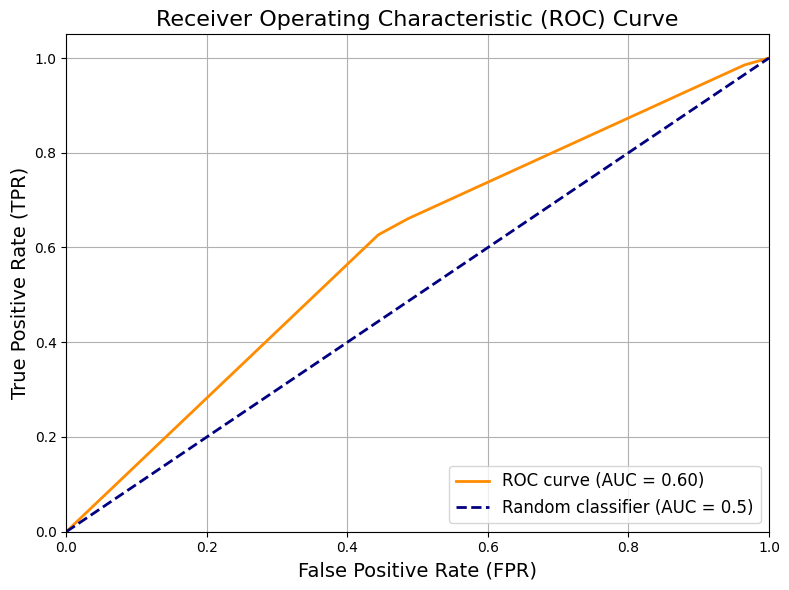

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

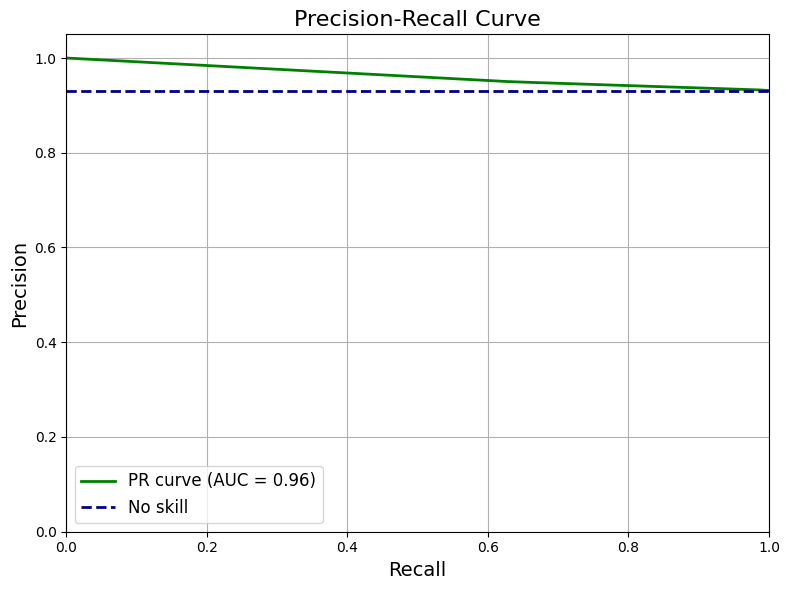

In [19]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.plot([0, 1], [sum(y_test)/len(y_test)]*2, color='navy', lw=2, linestyle='--', label='No skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="lower left", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()